In [57]:
import numpy as np

from scipy.integrate import fixed_quad
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'
import numpy as np
from scipy.special import roots_legendre, eval_legendre

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [58]:
def riemann_sum(f, partition, method = 0):
    """Compute the {left|middle|right} Reimann sum of f(x) given the partition.
    
    :param f:
        A function of one variable 
    :param partition:
        A sequence of x partition points; the length must be greater than or equal to 2
    :param method:
        Either -1 (left sum), 0 (middle sum), or 1 (right sum)
        The default is 0.
    """
    assert method == 0 or method == -1 or method == 1, f'Unrecognized method={method}'
    #assert가 false 가 되면 Unrecognized method가 뜨게 하여, 함수 내의 오류가 아님을 보여준다. 
        
    dx = [r - l for (l, r) in zip(partition[:-1], partition[1:])]
    N  = len(partition) - 1
    
    li = 0 + int(method > 0) #left
    ri = 1 - int(method < 0) #right
    
    
    #이해가 안되는 부분...
    xi = [0.5 * (r + l) for (l, r) in
          zip(partition[li:(li+N)], 
              partition[ri:(ri+N)])
         ] #mid
    
    return sum(f(x) * d for (x, d) in zip(xi, dx))

In [65]:
def simpson_sum(f, partition):
    fx = [f(x) for x in partition]
    fmid_dx = [(f(0.5 * (r + l)), r - l) for (l, r) in zip(partition[:-1], partition[1:])]
    # 모양을 잘 분석하면 어렵지 않다.
    # 원래 공식의 여기서는 아래의 c, d 값을 구해야 하기 때문에  튜플의 형태로 구해주는데,
    # 각 구간마다 r-l은 곧 dx(b-a)의 의미이고, 아래의 d를 의미.
    # (x_i-1 + x_i) / 2 의 값은 4f((x_i-1 + x_i) / 2) 에 들어갈 c 를 의미.
    return sum((a + b + 4*c) * d for (a, b, (c, d)) in zip(fx[:-1], fx[1:], fmid_dx)) / 6
    # a, b는 그냥 (1,2)/(2,3) 처럼 각 부분을 나타내면 되니까, 
    # zip을 이용하여 a, b, c, d 구현
    

In [66]:
def trapezoid_sum(f, partition):
    """Compute the integral of f(x) given the partition using the trapezoid rule.
    
    :param f:
        A function of one variable
    :param partition:
        A sequence of x partition points; the length must be greater than or equal to 2
    """
    
    fx = [f(x) for x in partition] # linspace로 x값들을 분할해서 리스트에 저장
    dx = [r - l for (l, r) in zip(partition[:-1], partition[1:])] #,(2 - 1)/(3 - 2) ...이렇게 나타남
    return 0.5 * sum((a + b) * d for (a, b, d) in zip(fx[:-1], fx[1:], dx)) #공식 그대로 대입

In [4]:
def min_fixed_only_quad(f, N):
    roots, weights = roots_legendre(N)
    xi = roots
    wi = weights
    return sum(w*(f(x)) for w, x in zip(wi, xi))

In [38]:
def f(x):
    return np.exp(x)

## 불연속성인데도 계산이 된다. 근데 trapezoid-sum은 왜 정확도를 이룰까??

In [165]:
def f(x):
    return 1 / x

In [189]:
a = min_fixed_any_range(f, -1, 1, 100)
b = riemann_sum(f, np.linspace(-1, 1, 100), method=0)
c = simpson_sum(f, np.linspace(-1, 1, 100))
d = trapezoid_sum(f, np.linspace(-1, 1, 100))

print(f"""
Gaussian-legendre method: {a},
Riemann-sum method.     : {b},
Simson-sum method.      : {c},
Trapezoid-sum method.   : {d}""")


Gaussian-legendre method: -9.877081791342945e-17,
Riemann-sum method.     : 363927242615797.8,
Simson-sum method.      : 242618161743865.6,
Trapezoid-sum method.   : -2.5830032557294658e-14


## 단위 계단 함수(Heaviside steop function) 
#### 실제 적분 값은 라플라스 변환을 통해서 구해야 할듯.
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=leesu52&logNo=90189504569

In [205]:
def g(x):
    if isinstance(x, np.ndarray):
        return np.where(x >= 0, 1, 0.0)
    else:
        return 1.0 if x > 0 else 0.0

<Figure size 640x480 with 0 Axes>

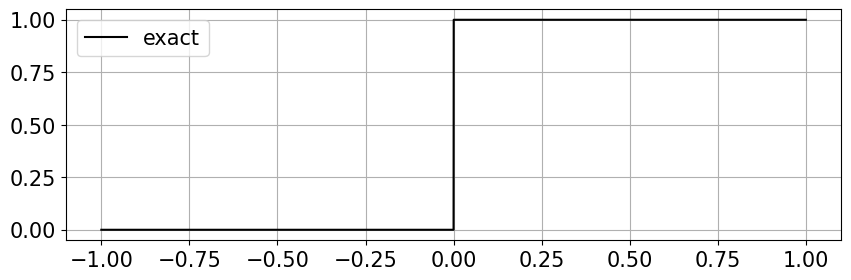

In [206]:
x = np.linspace(-1, 1, 10000)
y = g(x)
"""
from scipy import special

partition = np.linspace(0, 3, 31)
partial_sums = [
    min_fixed_any_range(lambda t: np.exp(-t*t), a, b, n=5)
    for (a, b) in zip(partition[:-1], partition[1:])
]

xs = partition
approx_erf = np.cumsum(partial_sums) * 2/np.sqrt(np.pi)
print(np.sum(partial_sums) * 2/np.sqrt(np.pi))
approx_erf = np.hstack(([0], approx_erf)) # erf(0) = 0

x_exact = np.linspace(0, 3, 200)
y_exact = special.erf(x_exact)
"""
plt.figure()

plt.figure(figsize=(10,3))
plt.plot(x, y, "-k", label="exact")
#plt.plot(xs, approx_erf, ".:r", lw=1, label="approx")
plt.legend()
plt.grid()
plt.savefig("Error_Funcion.pdf")

In [207]:
a = min_fixed_any_range(g, -1, 1, 10)
b = riemann_sum(g, np.linspace(-1, 1, 10), method=0)
c = simpson_sum(g, np.linspace(-1, 1, 10))
d = trapezoid_sum(g, np.linspace(-1, 1, 10))

print(f"""
Gaussian-legendre method: {a},
Riemann-sum method.     : {b},
Simson-sum method.      : {c},
Trapezoid-sum method.   : {d}""")


Gaussian-legendre method: 1.0,
Riemann-sum method.     : 0.8888888888888888,
Simson-sum method.      : 0.9259259259259259,
Trapezoid-sum method.   : 1.0


In [177]:
def h(x):
    return np.exp(x) + x**3 + np.sin(x)

In [190]:
a = min_fixed_any_range(h, -1, 2, 10)
b = riemann_sum(h, np.linspace(-1, 2, 10), method=0)
c = simpson_sum(h, np.linspace(-1, 2, 10))
d = trapezoid_sum(h, np.linspace(-1, 2, 10))
real = 11.727625800174490010033408527357285739232815631213546608004538249
print(f"""
Gaussian-legendre method: {a}, abs error :{real - a}
Riemann-sum method.     : {b}, abs error :{real - b}
Simson-sum method.      : {c}, abs error :{real - c}
Trapezoid-sum method.   : {d} abs error :{real - d}""")


Gaussian-legendre method: 11.727625800174474, abs error :1.5987211554602254e-14
Riemann-sum method.     : 11.658001117537395, abs error :0.06962468263709454
Simson-sum method.      : 11.727659912174076, abs error :-3.4111999585917374e-05
Trapezoid-sum method.   : 11.866977501447437 abs error :-0.13935170127294683
